## Data Mining Project 3 - Group 7
### Saya Hashemian (9822090) - Reyhaneh Tarighaty Tabesh (9813022) - Kiarash Mokhtari Dizaji (9830032)

## Table of Contents
* [1. Importing necessary packages](#chapter1)
* [2. Loading The Breast cancer dataset](#chapter2)
    * [2.1. About the Dataset](#section_2_1)
* [3. Preprocessing of the Dataset & EDA](#chapter3)
* [4. Implementation of MLP Models using Label encoding](#chapter4)
    * [4.1. MLP model with epochs = 10 and Learning Rate = 0.001](#section_4_1)
    * [4.2. MLP model with epochs = 10 and Learning Rate = 0.01](#section_4_2)
    * [4.3. MLP model with epochs = 20 and Learning Rate = 0.001](#section_4_3)
    * [4.4. MLP model with epochs = 20 and Learning Rate = 0.01](#section_4_4)
* [5. Choosing the best model](#chapter5)
* [6. Evaluation](#chapter6)

## 1. Importing necessary packages <a class="anchor" id="chapter1"></a>

In [50]:
from google.colab import drive
import numpy as np
import pandas as pd
import tensorflow as tf
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix

## 2. Loading The Breast cancer Dataset <a class="anchor" id="chapter2"></a>

<div dir="rtl"> برای شروع دیتاست را میخوانیم و شروع به بررسی آن میکنیم. </div>


In [51]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [52]:
df = pd.read_csv('drive/My Drive/Data mining/breast cancer.csv')

In [53]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


<div dir="rtl"> تعداد سطرها و ستون های دیتاست را ذخیره میکنیم. </div>

In [54]:
shape_row, shape_col = df.shape
print("Number of Row:", shape_row)
print("Number of Column:", shape_col)

Number of Row: 569
Number of Column: 32


<div dir="rtl"> با استفاده از "()info." درباره ی مشخصات ویژگی ها و همچنین نوع داده ی مربوط به آن ها اطلاعات کسب میکنیم.  </div>


In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

### 2.1. About the Dataset <a class="anchor" id="section_2_1"></a>

1. **ID number**

2. **Diagnosis** (M = malignant, B = benign)

3. **radius** (mean of distances from center to points on the perimeter)

4. **texture** (standard deviation of gray-scale values)

5. **perimeter**

6. **area**

7. **smoothness** (local variation in radius lengths)

8. **compactness** (perimeter^2 / area - 1.0)

9. **concavity** (severity of concave portions of the contour)

10. **concave points** (number of concave portions of the contour)

11. **symmetry**

12. **fractal dimension** ("coastline approximation" - 1)

13. The mean, standard error and "worst" or largest (mean of the three largest values) of these features were computed for each image, resulting in 30 features. For instance, field 3 is Mean Radius, field 13 is Radius SE, field 23 is Worst Radius.

All feature values are recoded with four significant digits.

Missing attribute values: none

Class distribution: 357 benign, 212 malignant

<div dir="rtl"> در این قسمت ویژگی های عددی از دیتا را نیز با استفاده از تابع "()describe." استخراج میکنیم.  </div>


In [56]:
df.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


## 3. Preprocessing of the Dataset & EDA<a class="anchor" id="chapter3"></a>

<div dir="rtl"> در این قسمت داده‌های فیچر
diagnosis
را از حالت غیر عددی به عددی تبدیل می‌کنیم. داده‌هایی که خوش خیم یا B بودند را با 0 و داده هایی که بدخیم یا M بودند را با 1 جایگذین کردیم.
</div>

In [57]:
df['diagnosis'] = df['diagnosis'].replace({'B': 0, 'M': 1})

<div dir="rtl">
حال برای اینکه بتوانیم یک لیبل برای هر رکورد داشته باشیم، فیچر diagnosis را به عنوان y استخراج میکنیم.

سپس فیچرهای id و diagnosis را از دیتابیس حذف میکنیم  
</div>

In [58]:
y = df.diagnosis
X = df.drop(['id','diagnosis'],axis = 1 )
X.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


<div dir="rtl">
در اینجا ماتریس correlation را رسم میکنیم.
در اینجا سعی شده است یک نمودار همبستگی ترسیم کنیم تا ببینیم آیا ویژگی های مستقل با ویژگی های وابسته مرتبط هستند یا خیر.
</div>

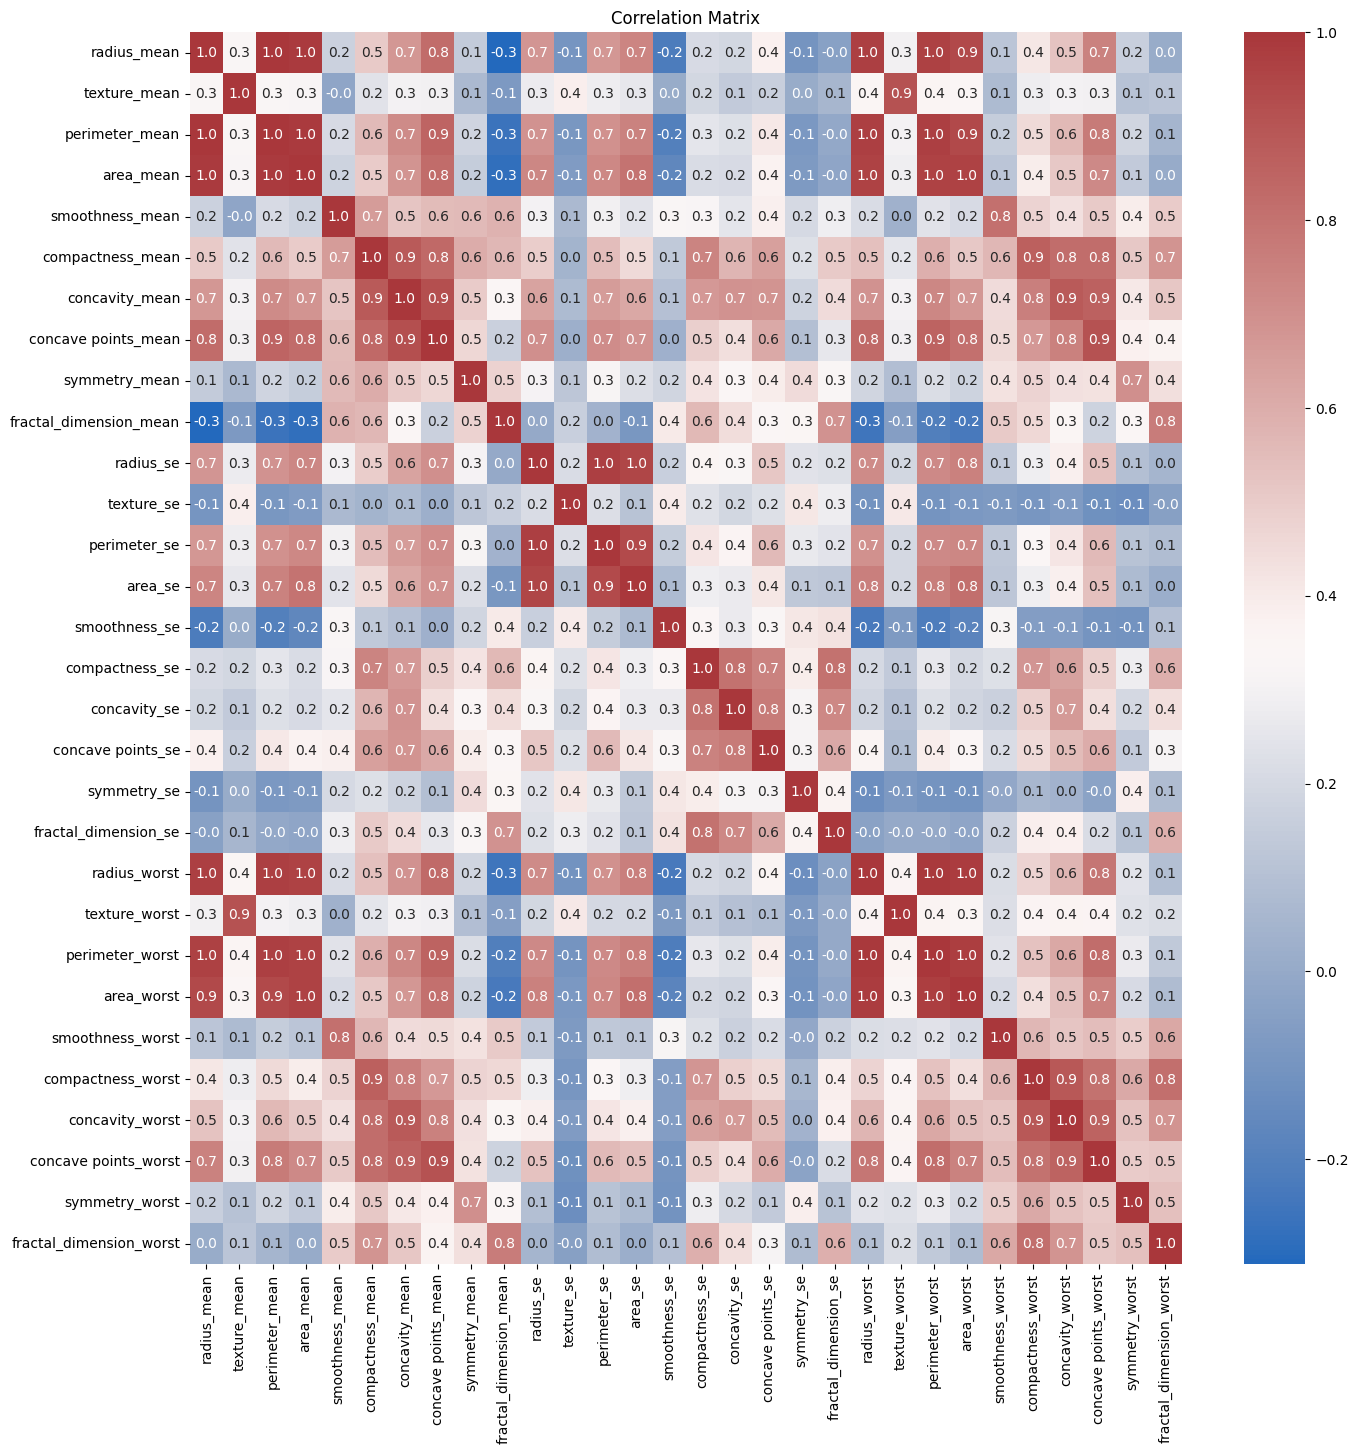

In [59]:
correlation_matrix = X.corr()
plt.figure(figsize=(16, 16))
sns.heatmap(correlation_matrix, annot=True,fmt= '.1f', cmap='vlag')
plt.title('Correlation Matrix')
plt.show()

<div dir="rtl">
این قسمت از کد از الگوریتم رندوم فارست برای آموزش یک دسته‌بند بر روی داده‌های X به همراه برچسب‌های متناظر y استفاده می‌کند. سپس اهمیت ویژگی‌ها را محاسبه کرده و آن‌ها را چاپ می‌کند. این مقادیر اهمیت نشان می‌دهد که هر ویژگی چقدر در پیش‌بینی‌ها تاثیرگذار است. در زیر توضیحی در مورد هر خط کد آمده است:

۱. `rf = RandomForestClassifier`: در این خط یک نمونه از کلاس "RandomForestClassifier" ساخته می‌شود. این دسته‌بند با پارامترهای پیش‌فرض مقداردهی اولیه می‌شود.

۲. `rf.fit(X, y)`: با استفاده از متد "fit" روی دسته‌بند "RandomForestClassifier"، آن را بر روی داده‌های X و برچسب‌های y آموزش می‌دهیم. در این مرحله، تعدادی درخت تصمیم براساس داده‌های ارائه شده ساخته می‌شوند.

۳. `feature_importances = rf.feature_importances_`: بعد از آموزش دسته‌بند جنگل تصادفی، به ویژگی "feature_importances_" دسترسی داریم تا امتیازهای اهمیت را برای هر ویژگی به دست آوریم. این امتیازها نشان‌دهنده اهمیت نسبی هر ویژگی است.

۴. `sorted_indices = np.argsort(feature_importances)[::-1]`: تابع "argsort" از کتابخانه NumPy استفاده شده است تا شاخص‌هایی که اهمیت ویژگی‌ها را به ترتیب صعودی مرتب می‌کند، به دست آید.

با مشاهده اهمیت ویژگی‌ها، می‌توان درکی از ویژگی‌هایی که بیشترین توان پیش‌بینی را دارند، پیدا کرد. این اطلاعات می‌تواند در درک بهتر مجموعه داده و در صورت نیاز، در انتخاب ویژگی یا اصلاح ویژگی‌ها مفید باشد.
</div>

In [60]:
# Create a random forest classifier
rf = RandomForestClassifier()

# Fit the random forest classifier on the data
rf.fit(X, y)

# Get feature importances from the random forest
feature_importances = rf.feature_importances_

# Sort the feature importances in descending order
sorted_indices = np.argsort(feature_importances)[::-1]

# Print the feature importances in descending order
for i in sorted_indices:
    print(f"{X.columns[i]}: {feature_importances[i]}")

radius_worst: 0.14412805902152095
concave points_worst: 0.14013484251556202
concave points_mean: 0.11150135429926437
perimeter_worst: 0.10669283705820576
area_worst: 0.09965457016481244
area_mean: 0.051424572208362496
concavity_mean: 0.042425469184575244
radius_mean: 0.03735636003790418
area_se: 0.03716420513155321
concavity_worst: 0.03675641041109433
perimeter_mean: 0.03450705966786776
texture_worst: 0.019736262566175992
radius_se: 0.018966820624429618
texture_mean: 0.016044855994590712
smoothness_worst: 0.013631859455968138
compactness_mean: 0.013021442884448368
compactness_worst: 0.012244054635848501
symmetry_worst: 0.008766128349638873
concavity_se: 0.008381207215784552
fractal_dimension_worst: 0.006612327963585579
perimeter_se: 0.0061429710735407955
compactness_se: 0.005505565009893818
fractal_dimension_se: 0.005387585984259763
smoothness_se: 0.004201883387755165
texture_se: 0.004043252256498283
symmetry_mean: 0.003975428503433415
concave points_se: 0.0033244053304381034
smoothnes

<div dir="rtl">
پس از اینکه با استفاده از رندوم فارست اهمیت هر ویژگی را پیدا کردیم، آن هارا مرتب میکنیم.
k تا ویژگی با بیشترین اهمیت را میخواهیم نگه داریم و بقیه فیچر ها که از اهمیت کمتری برخوردار بودند را حذف میکنیم. ما k  را برابر ۲۰ در نظر گرفتیم.

برای این کار روش های دیگری نیز وجود داشت. مثلا میتوانستیم یک
threshold
در نظر بگیریم و اگر اهمیت یک فیچر از آن کمتر بود آن فیچر را حذف میکنیم.
</div>

In [61]:
k = 20
top_features = X.columns[sorted_indices[:k]]
X_filtered = X[top_features]

In [62]:
X_filtered.head()

,radius_worst,concave points_worst,concave points_mean,perimeter_worst,area_worst,area_mean,concavity_mean,radius_mean,area_se,concavity_worst,perimeter_mean,texture_worst,radius_se,texture_mean,smoothness_worst,compactness_mean,compactness_worst,symmetry_worst,concavity_se,fractal_dimension_worst
0,25.38,0.2654,0.14710,184.60,2019.0,1001.0,0.3001,17.99,153.40,0.7119,122.80,17.33,1.0950,10.38,0.1622,0.27760,0.6656,0.4601,0.05373,0.11890
1,24.99,0.1860,0.07017,158.80,1956.0,1326.0,0.0869,20.57,74.08,0.2416,132.90,23.41,0.5435,17.77,0.1238,0.07864,0.1866,0.2750,0.01860,0.08902
2,23.57,0.2430,0.12790,152.50,1709.0,1203.0,0.1974,19.69,94.03,0.4504,130.00,25.53,0.7456,21.25,0.1444,0.15990,0.4245,0.3613,0.03832,0.08758
3,14.91,0.2575,0.10520,98.87,567.7,386.1,0.2414,11.42,27.23,0.6869,77.58,26.50,0.4956,20.38,0.2098,0.28390,0.8663,0.6638,0.05661,0.17300
4,22.54,0.1625,0.10430,152.20,1575.0,1297.0,0.1980,20.29,94.44,0.4000,135.10,16.67,0.7572,14.34,0.1374,0.13280,0.2050,0.2364,0.05688,0.07678


## 4. Implementation of MLP Models using Label encoding<a class="anchor" id="chapter4"></a>

<div dir="rtl">
این قسمت از کد داده‌ها را به مجموعه‌های آموزش و آزمون تقسیم می‌کند و چهار مدل متفاوت شبکه عصبی  (MLP) را تعریف کردیم:

۱. `X_train, X_test, y_train, y_test = train_test_split(X_normalized, y, test_size=0.2, random_state=42)`: در این خط، داده‌ها را به مجموعه‌های آموزش و آزمون تقسیم می‌کند. `X_normalized` حاوی داده‌های ویژگی‌ها است و `y` حاوی برچسب‌ها (diagnosis) است. `test_size=0.2` میزان نسبت داده‌های آزمون به کل داده‌ها را تعیین می‌کند و در اینجا ۲۰٪ از داده‌ها را برای آزمون استفاده می‌کنیم. `random_state=42` تضمین می‌کند که هر بار تقسیم داده‌ها به همین صورت انجام شود.

۲. `model1`, `model2`, `model3`, و `model4`: این خطوط، چهار مدل مختلف شبکه عصبی  را تعریف می‌کند. هر مدل شامل سه لایه  با تابع فعالسازی `relu` و یک لایه  با تابع فعالسازی `sigmoid` است. این مدل‌ها برای مقایسه عملکرد در تنظیمات مختلف ایجاد شده‌اند.

هر مدل می‌تواند برای آموزش با مجموعه‌های آموزش `X_train` و `y_train` و برای ارزیابی با مجموعه‌های آزمون `X_test` و `y_test` استفاده شود.
</div>

<div dir="rtl">
 برای استاندارد سازی داده ها ابتدا یک آبجکت
 scaler
 ساختیم و سپس داده‌های
 X_filtered
 را با آن فیت کردیم
 (مقدار انحراف معیار و میانگین برای هر فیجر را محاسبه کردیم)
 و با استفاده از
 transform
 داده‌ها را مقیاس بندی کردیم و در انتها در
 X_normalized
 ذخیره کردیم.
</div>

In [67]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Perform dataset normalization on training set
scaler = StandardScaler()
X_train_normalized = scaler.fit_transform(X_train)

# Apply the same normalization to the test set
X_test_normalized = scaler.transform(X_test)

# Define the MLP models
model1 = tf.keras.models.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=(X_train_normalized.shape[1],)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model2 = tf.keras.models.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=(X_train_normalized.shape[1],)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model3 = tf.keras.models.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=(X_train_normalized.shape[1],)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model4 = tf.keras.models.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=(X_train_normalized.shape[1],)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

### 4.1. MLP model with epochs = 10 and Learning Rate = 0.001 <a class="anchor" id="section_4_1"></a>

<div dir="rtl">
این قسمت از کد، تنظیمات بهینه‌ساز (optimizer) و آموزش مدل اول (model1) را مشخص می‌کند و سپس عملکرد آن را در مجموعه آزمون ارزیابی می‌کند.
</div>

In [68]:
optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)

model1.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

model1.fit(X_train_normalized, y_train, epochs=10, batch_size=32, validation_split=0.2, verbose=1)

loss1, accuracy1 = model1.evaluate(X_test_normalized, y_test)
print("Test Loss1:", loss1)
print("Test Accuracy1:", accuracy1)

Epoch 1/10
12/12 [==============================] - 2s 21ms/step - loss: 0.4656 - accuracy: 0.8489 - val_loss: 0.3382 - val_accuracy: 0.9560
Epoch 2/10
12/12 [==============================] - 0s 6ms/step - loss: 0.2685 - accuracy: 0.9560 - val_loss: 0.2069 - val_accuracy: 0.9560
Epoch 3/10
12/12 [==============================] - 0s 5ms/step - loss: 0.1736 - accuracy: 0.9615 - val_loss: 0.1466 - val_accuracy: 0.9670
Epoch 4/10
12/12 [==============================] - 0s 8ms/step - loss: 0.1236 - accuracy: 0.9780 - val_loss: 0.1205 - val_accuracy: 0.9780
Epoch 5/10
12/12 [==============================] - 0s 5ms/step - loss: 0.0969 - accuracy: 0.9835 - val_loss: 0.1048 - val_accuracy: 0.9780
Epoch 6/10
12/12 [==============================] - 0s 5ms/step - loss: 0.0798 - accuracy: 0.9863 - val_loss: 0.0949 - val_accuracy: 0.9780
Epoch 7/10
12/12 [==============================] - 0s 5ms/step - loss: 0.0681 - accuracy: 0.9863 - val_loss: 0.0895 - val_accuracy: 0.9780
Epoch 8/10
12/12 [=

### 4.2. MLP model with epochs = 10 and Learning Rate = 0.01 <a class="anchor" id="section_4_2"></a>

<div dir="rtl">
این قسمت از کد، تنظیمات بهینه‌ساز (optimizer) و آموزش مدل اول (model2) را مشخص می‌کند و سپس عملکرد آن را در مجموعه آزمون ارزیابی می‌کند.
</div>

In [69]:
optimizer = tf.keras.optimizers.Adam(learning_rate=0.01)

model2.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

model2.fit(X_train_normalized, y_train, epochs=10, batch_size=32, validation_split=0.2, verbose=1)

loss2, accuracy2 = model2.evaluate(X_test_normalized, y_test)
print("Test Loss2:", loss2)
print("Test Accuracy2:", accuracy2)

Epoch 1/10
12/12 [==============================] - 1s 19ms/step - loss: 0.2163 - accuracy: 0.8929 - val_loss: 0.0966 - val_accuracy: 0.9670
Epoch 2/10
12/12 [==============================] - 0s 5ms/step - loss: 0.0709 - accuracy: 0.9780 - val_loss: 0.0812 - val_accuracy: 0.9670
Epoch 3/10
12/12 [==============================] - 0s 5ms/step - loss: 0.0417 - accuracy: 0.9890 - val_loss: 0.0776 - val_accuracy: 0.9780
Epoch 4/10
12/12 [==============================] - 0s 5ms/step - loss: 0.0294 - accuracy: 0.9918 - val_loss: 0.1049 - val_accuracy: 0.9560
Epoch 5/10
12/12 [==============================] - 0s 5ms/step - loss: 0.0180 - accuracy: 0.9945 - val_loss: 0.0859 - val_accuracy: 0.9670
Epoch 6/10
12/12 [==============================] - 0s 6ms/step - loss: 0.0116 - accuracy: 0.9973 - val_loss: 0.1163 - val_accuracy: 0.9560
Epoch 7/10
12/12 [==============================] - 0s 5ms/step - loss: 0.0113 - accuracy: 0.9973 - val_loss: 0.0987 - val_accuracy: 0.9560
Epoch 8/10
12/12 [=

### 4.3. MLP model with epochs = 20 and Learning Rate = 0.001 <a class="anchor" id="section_4_3"></a>

<div dir="rtl">
این قسمت از کد، تنظیمات بهینه‌ساز (optimizer) و آموزش مدل اول (model3) را مشخص می‌کند و سپس عملکرد آن را در مجموعه آزمون ارزیابی می‌کند.
</div>

In [73]:
optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)

model3.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

model3.fit(X_train_normalized, y_train, epochs=20, batch_size=32, validation_split=0.2, verbose=1)

loss3, accuracy3 = model3.evaluate(X_test_normalized, y_test)
print("Test Loss3:", loss3)
print("Test Accuracy3:", accuracy3)

Epoch 1/20
12/12 [==============================] - 1s 20ms/step - loss: 0.0034 - accuracy: 1.0000 - val_loss: 0.1423 - val_accuracy: 0.9451
Epoch 2/20
12/12 [==============================] - 0s 7ms/step - loss: 0.0018 - accuracy: 1.0000 - val_loss: 0.1574 - val_accuracy: 0.9451
Epoch 3/20
12/12 [==============================] - 0s 6ms/step - loss: 0.0015 - accuracy: 1.0000 - val_loss: 0.1601 - val_accuracy: 0.9451
Epoch 4/20
12/12 [==============================] - 0s 6ms/step - loss: 0.0012 - accuracy: 1.0000 - val_loss: 0.1544 - val_accuracy: 0.9451
Epoch 5/20
12/12 [==============================] - 0s 6ms/step - loss: 0.0010 - accuracy: 1.0000 - val_loss: 0.1586 - val_accuracy: 0.9451
Epoch 6/20
12/12 [==============================] - 0s 6ms/step - loss: 7.8755e-04 - accuracy: 1.0000 - val_loss: 0.1594 - val_accuracy: 0.9451
Epoch 7/20
12/12 [==============================] - 0s 5ms/step - loss: 6.8422e-04 - accuracy: 1.0000 - val_loss: 0.1607 - val_accuracy: 0.9451
Epoch 8/20


### 4.4. MLP model with epochs = 20 and Learning Rate = 0.01 <a class="anchor" id="section_4_4"></a>

<div dir="rtl">
این قسمت از کد، تنظیمات بهینه‌ساز (optimizer) و آموزش مدل اول (model4) را مشخص می‌کند و سپس عملکرد آن را در مجموعه آزمون ارزیابی می‌کند.
</div>

In [71]:
optimizer = tf.keras.optimizers.Adam(learning_rate=0.01)

model4.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

model4.fit(X_train_normalized, y_train, epochs=20, batch_size=32, validation_split=0.2, verbose=1)

loss4, accuracy4 = model4.evaluate(X_test_normalized, y_test)
print("Test Loss4:", loss4)
print("Test Accuracy4:", accuracy4)

Epoch 1/20
12/12 [==============================] - 1s 18ms/step - loss: 0.2143 - accuracy: 0.9038 - val_loss: 0.1083 - val_accuracy: 0.9780
Epoch 2/20
12/12 [==============================] - 0s 7ms/step - loss: 0.0813 - accuracy: 0.9753 - val_loss: 0.1171 - val_accuracy: 0.9560
Epoch 3/20
12/12 [==============================] - 0s 5ms/step - loss: 0.0494 - accuracy: 0.9863 - val_loss: 0.1428 - val_accuracy: 0.9451
Epoch 4/20
12/12 [==============================] - 0s 6ms/step - loss: 0.0359 - accuracy: 0.9918 - val_loss: 0.1159 - val_accuracy: 0.9451
Epoch 5/20
12/12 [==============================] - 0s 5ms/step - loss: 0.0282 - accuracy: 0.9918 - val_loss: 0.0894 - val_accuracy: 0.9560
Epoch 6/20
12/12 [==============================] - 0s 5ms/step - loss: 0.0220 - accuracy: 0.9890 - val_loss: 0.0999 - val_accuracy: 0.9780
Epoch 7/20
12/12 [==============================] - 0s 6ms/step - loss: 0.0174 - accuracy: 0.9918 - val_loss: 0.0835 - val_accuracy: 0.9670
Epoch 8/20
12/12 [=

## 5. Choosing the best model<a class="anchor" id="chapter5"></a>

<div dir="rtl">
با توجه به دقت آزمایشی چهار مدل با اپوک‌ها و نرخ یادگیری مختلف، عملکرد آن‌ها را تحلیل و مقایسه کنیم:

- دقت آزمایشی ۱: 0.9736841917037964
- دقت آزمایشی ۲: 0.9649122953414917
- دقت آزمایشی ۳: 0.9736841917037964
- دقت آزمایشی ۴: 0.9649122953414917

بر اساس دقت‌های آزمایشی ارائه شده، به نظر می‌رسد دقت آزمایشی اول و سوم با مقدار  دقت آزمایشی  0.9736 بالاترین دقت را دارد. بنابراین، ما به دلخواه مدل اول را انتخاب میکنیم که متناظر با دقت آزمایشی 0.9736 است.

انتخاب تعداد مناسبی از اپوک‌ها و نرخ یادگیری می‌تواند تأثیر قابل توجهی بر عملکرد و همگرایی شبکه عصبی داشته باشد. در زیر تأثیر انتخاب اپوک‌ها و نرخ یادگیری را بررسی می‌کنیم:

1. اپوک‌ها: تعداد اپوک‌ها تعداد بارهایی است که کل مجموعه داده در حین آموزش به شبکه عصبی داده می‌شود. انتخاب تعداد مناسب از اپوک‌ها برای جلوگیری از underfitting یا overfitting بسیار حائز اهمیت است. underfitting زمانی رخ می‌دهد که مدل الگوهای موجود در داده‌ها را تشخیص نمی‌دهد و دقت پایینی را ارائه می‌دهد. overfitting در مواقعی رخ می‌دهد که مدل داده‌های آموزش را به طور غیرمناسب یاد گرفته است و به خوبی به داده‌های ناشناخته واکنش نشان نمی‌دهد.

2. نرخ یادگیری: نرخ یادگیری مقداری است که نشان می‌دهد در هر مرحله مدل به چه اندازه وزن‌ها و انحراف‌ها را تنظیم می‌کند. نرخ یادگیری بالا می‌تواند باعث گذر از حد بهینه شود و نتایج نامناسب و ناپایداری را ارائه دهد. از سوی دیگر، نرخ یادگیری بسیار پایین می‌تواند باعث کند شدن همگرایی مدل و دشوار شدن رسیدن به حد بهینه شود.

دقت آزمایشی اول و سوم دقت بالاتری را دارند که نشان می‌دهد مدل اول و سوم با ترکیب مناسبی از اپوک‌ها و نرخ یادگیری نسبت به سایر مدل‌ها دقت و قابلیت تصمیم بالاتری در تشخیص داده‌های ناشناخته دارند. با این حال، بدون داشتن اطلاعات دقیق در مورد اپوک‌ها و نرخ یادگیری هر مدل، دشوار است تحلیلی دقیق‌تر درباره تأثیر آن‌ها ارائه داد.
</div>

## 6. Evaluation<a class="anchor" id="chapter6"></a>

<div dir="rtl">
این قسمت از کد، عملکرد مدل آموزش‌دیده (model1) را بر روی مجموعه آزمون ارزیابی کردیم و گزارش دسته‌بندی (classification report) و ماتریس آشفتگی (confusion matrix) را تولید کردیم:

۱. `y_pred = model1.predict(X_test)`: در این خط، مدل1 (model1) روی مجموعه آزمون (X_test) پیش‌بینی می‌کند و نتایج پیش‌بینی را در `y_pred` ذخیره می‌کند. این بردار شامل احتمالات برچسب "1" (diagnosis M) برای هر نمونه است.

۲. `y_pred_classes = (y_pred > 0.5).astype(int)`: در این خط، مقادیر پیش‌بینی `y_pred` به برچسب‌های دودویی تبدیل می‌شوند. اگر احتمال پیش‌بینی بیشتر از ۰.۵ باشد، برچسب تخمین زده شده را ۱ (M) قرار می‌دهیم؛ در غیر این صورت، برچسب تخمین زده شده را ۰ (B) قرار می‌دهیم.

۳. `report = classification_report(y_test, y_pred_classes)`: در این خط، گزارش دسته‌بندی (classification report) براساس برچسب‌های حقیقی `y_test` و برچسب‌های پیش‌بینی شده `y_pred_classes` تولید می‌شود. این گزارش شامل معیارهایی مانند Precision ، Recall و f1-score است که نشان می‌دهد عملکرد مدل در هر کلاس و به طور کلی چگونه است.

۵. `cm = confusion_matrix(y_test, y_pred_classes)`: در این خط، ماتریس آشفتگی (confusion matrix) براساس برچسب‌های حقیقی `y_test` و برچسب‌های پیش‌بینی شده `y_pred_classes` تولید می‌شود. این ماتریس نشان می‌دهد که هر برچسب چه تعداد نمونه صحیح و نادرست تشخیص داده شده است.
</div>

In [76]:
# Evaluate the model on the test set
y_pred = model1.predict(X_test_normalized)
y_pred_classes = (y_pred > 0.5).astype(int)

# Generate classification report
report = classification_report(y_test, y_pred_classes)
print("Classification Report:\n", report)

# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred_classes)
print("Confusion Matrix:\n", cm)

4/4 [==============================] - 0s 9ms/step
Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.99      0.98        71
           1       0.98      0.95      0.96        43

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114

Confusion Matrix:
 [[70  1]
 [ 2 41]]


<div

<div dir="rtl">
 ماتریس آشفتگی را بر اساس مسئله دسته‌بندی دودویی (B: خوش‌خیم، M: بدخیم) تحلیل می‌کنیم:

- True Positive (TP): مدل به درستی ۷۰ نمونه را به عنوان خوش‌خیم (B) پیش‌بینی کرده است.
- False Negative (FN): مدل به طور نادرست ۱ نمونه را به عنوان بدخیم (M) پیش‌بینی کرده است در حالی که در واقع خوش‌خیم (B) هستند.
- False Positive (FP): مدل به طور نادرست ۲ نمونه را به عنوان خوش‌خیم (B) پیش‌بینی کرده است در حالی که در واقع بدخیم (M) هستند.
- True Negative (TN): مدل به درستی ۴۱ نمونه را به عنوان بدخیم (M) پیش‌بینی کرده است.

به طور کلی، ماتریس آشفتگی نشان می‌دهد که مدل در پیش‌بینی هم نوع‌های خوش‌خیم (B) و بدخیم (M) با تعداد کمی اشتباه عمل کرده است.

تحلیلی در مورد عملکرد مدل  :
با توجه به گزارش دسته‌بندی ارائه شده، می‌توانیم عملکرد مدل را تحلیل کنیم. در ادامه تجزیه‌کننده گزارش عملکرد مدل آمده است:

- Precision: دقت میزان صحت پیش‌بینی‌های مثبت را اندازه‌گیری می‌کند.
  - دقت برای کلاس ۰ (خوش‌خیم) برابر با ۰.۹۷ است که نشان می‌دهد ۹۷٪ نمونه‌هایی که به عنوان خوش‌خیم پیش‌بینی شده‌اند در واقع خوش‌خیم هستند.
  - دقت برای کلاس ۱ (بدخیم) برابر با ۰.۹۸ است که نشان می‌دهد ۹۸٪ نمونه‌هایی که به عنوان بدخیم پیش‌بینی شده‌اند در واقع بدخیم هستند.

- Recall: بازخوانی درصد نمونه‌های مثبت واقعی را که به درستی شناسایی شده‌اند اندازه‌گیری می‌کند.
  - بازخوانی برای کلاس ۰ (خوش‌خیم) برابر با ۰.۹۹ است که نشان می‌دهد ۹۹٪ از نمونه‌های خوش‌خیم واقعی به درستی به عنوان خوش‌خیم شناسایی شده‌اند.
  - بازخوانی برای کلاس ۱ (بدخیم) برابر با ۰.۹۵ است که نشان می‌دهد ۹۵٪ از نمونه‌های بدخیم واقعی به درستی به عنوان بدخیم شناسایی شده‌اند.

- Accuracy: دقت نسبی در تشخیص صحیح کل نمونه‌ها توسط مدل را نشان می‌دهد.
  - دقت مدل برابر با ۰.۹۷ است که نشان می‌دهد مدل ۹۷٪ از نمونه‌ها در مجموعه داده را به درستی دسته‌بندی کرده است.

با توجه به معیارهای ارائه شده، می‌

توانیم نتیجه بگیریم که مدل در دسته‌بندی هم نوع‌های خوش‌خیم و بدخیم عملکرد بسیار خوبی دارد. این مدل دقت، بازخوانی و دقت بالایی را برای هر دو کلاس به دست آورده است که نشان از توازن مناسبی در شناسایی نمونه‌های مثبت به درستی و کاهش خطای مثبت و منفی دارد. دقت کلی ۹۷٪ نیز اثبات کننده کارایی مدل است.



</div>